<img src="image/python_supermercado_2025.jpg" alt="Descrição da imagem" width="80%">

# Análise Exploratória dos Dados

O objetivo deste notebook é realizar a análise exploratória de dados (EDA - Exploratory Data Analysis) da base de dados.

<font color="red"><b>ATENÇÃO:</b></font> xxx

<style>
    hr.hr_python{
        border: 0;
        height: 45px;
        background-image: url('https://i.ibb.co/GRfk7Rj/hr-python.png');
        background-repeat: repeat;
    }
</style>
<hr class='hr_python'>

<a id='indice'></a>
## Índice

* [1. Configura as bibliotecas](#1)
* [2. Define os parâmetros](#2)

[Retorna ao Índice](#indice)

<a id='1'></a>

## 1. Configura as bibliotecas

In [1]:
import time                       # !pip install time
import pandas as pd               # !pip install pandas
from functools import reduce      # !pip install functools
from nfceget import app           # !pip install nfceget, urllib3, bs4
import openpyxl
import matplotlib.pyplot as plt
from utils.tic_toc import tictoc
import warnings

# Suprimir avisos do Pandas
warnings.filterwarnings('ignore')

[Retorna ao Índice](#indice)

---
<a id='2'></a>

## 2. Define os parâmetros

Aqui estão os parâmetros que deverão ser alterados conforme necessidade.

In [2]:
tic = time.time()

# Diretório:
dir = 'G:\Meu Drive\Projetos\Github\model_supermarket'

# Caminhos para ler:
base = f'{dir}\\data\\notas_fiscais_supermercado.xlsx'

# Caminhos para salvar:


# Tipos dos dados:
var_tipos = {
    'chave': [
        'CHAVE',
    ],
    'data': [
        'DATA',
    ],
    'binario': [],
    'categorico': [ 
        'PERIODO',
        'CATEGORIA_PRODUTO',
    ],
    'string': [
        'SUPERMERCADO', 
        'PRODUTO',
        'UNIDADE',
    ],
    'inteiro': [
        'COD_PRODUTO', 
    ],
    'numerico': [
        'VALOR_UNIDADE', 
        'QTDE', 
        'VALOR_TOTAL',
    ],
}
var_tipos

{'chave': ['CHAVE'],
 'data': ['DATA'],
 'binario': [],
 'categorico': ['PERIODO', 'CATEGORIA_PRODUTO'],
 'string': ['SUPERMERCADO', 'PRODUTO', 'UNIDADE'],
 'inteiro': ['COD_PRODUTO'],
 'numerico': ['VALOR_UNIDADE', 'QTDE', 'VALOR_TOTAL']}

In [3]:
toc = time.time()
print(f'\n\033[33mEtapa 2 | Tempo:\033[0;0m {tictoc(tic, toc)}')


Etapa 2 | Tempo: (00:00:00) [24/03/2025 22:48:56 - [24/03/2025 22:48:56]


[Retorna ao Índice](#indice)

---
<a id='3'></a>

## 3. Leitura da base de dados

In [4]:
tic = time.time()

df = pd.read_excel(base)
df

,CHAVE,DATA,COD_PRODUTO,PRODUTO,SUPERMERCADO,UNIDADE,VALOR_UNIDADE,QTDE,VALOR_TOTAL,PERIODO,CATEGORIA_PRODUTO
0,00448fcaa702aee48b5d955a696d63ac108f96e24cd260...,06/01/2025,11126,CATCHUP QUERO 400G,MAX,Un,5.39,1.0,5.39,Noite,MOLHO
1,00448fcaa702aee48b5d955a696d63ac108f96e24cd260...,06/01/2025,1118,LOURO TRIANGULO 2G,MAX,Un,1.19,1.0,1.19,Noite,CONDIMENTO
2,00448fcaa702aee48b5d955a696d63ac108f96e24cd260...,06/01/2025,12063,REF ANTARCTICA 350ML,MAX,Un,2.49,1.0,2.49,Noite,BEBIDA
3,00448fcaa702aee48b5d955a696d63ac108f96e24cd260...,06/01/2025,124769,LTE COC BOMCOC 200ML,MAX,Un,1.98,1.0,1.98,Noite,OUTROS
4,00448fcaa702aee48b5d955a696d63ac108f96e24cd260...,06/01/2025,126336,LEITE COND PIRA 395G,MAX,Un,5.79,1.0,5.79,Noite,BEBIDA
...,...,...,...,...,...,...,...,...,...,...,...
1978,fff1228f3f74e693645891f1a399c1a24379849dd341b8...,16/02/2025,1201373,B LAC NESQUIK 180ML,ASSAI,Un,3.39,2.0,6.78,Tarde,OUTROS
1979,fff1228f3f74e693645891f1a399c1a24379849dd341b8...,16/02/2025,1206927,PIZZ PERD 460G BACON,ASSAI,Un,15.80,1.0,15.80,Tarde,ACOUGUE
1980,fff1228f3f74e693645891f1a399c1a24379849dd341b8...,16/02/2025,6404,DEL VALLE 1LT MARAC,ASSAI,Un,8.99,1.0,8.99,Tarde,BEBIDA
1981,fff1228f3f74e693645891f1a399c1a24379849dd341b8...,16/02/2025,6806,REF COCA COLA 350ML,ASSAI,La,3.69,1.0,3.69,Tarde,BEBIDA


In [5]:
toc = time.time()
print(f'\n\033[33mEtapa 3 | Tempo:\033[0;0m {tictoc(tic, toc)}')


Etapa 3 | Tempo: (00:00:00) [24/03/2025 22:48:56 - [24/03/2025 22:48:57]


[Retorna ao Índice](#indice)

---
<a id='4'></a>

## 4. Categorização

Na construção da base de dados foram realizadas duas categorizações:

1. Período do dia
2. Categoria do produto

Vamos verificar a volumetria de cada categoria dessas variáveis.

In [6]:
tic = time.time()

df.groupby('PERIODO')['PRODUTO'].count()

PERIODO
Manhã      97
Noite    1130
Tarde     756
Name: PRODUTO, dtype: int64

In [7]:
df.groupby('CATEGORIA_PRODUTO')['PRODUTO'].count()

# df[(df['CATEGORIA_PRODUTO'] == 'OUTROS') & (df['VALOR_TOTAL'] > 0)]

CATEGORIA_PRODUTO
ACOUGUE                48
BEBIDA                540
BEBIDA ALCOOLICA       79
BISCOITO E SNACK      107
BOMBONIERE            101
CEREAL                 24
CONDIMENTO             70
CONGELADO              77
COSMETICO              18
HORTIFRUTI            142
LATARIA E CONSERVA      4
LATICINIO              63
LIMPEZA E LIMPEZA     100
MASSA                  97
MERCEARIA             104
MOLHO                 131
OUTROS                 65
PADARIA E FRIOS       178
UTILIDADES             35
Name: PRODUTO, dtype: int64

In [8]:
toc = time.time()
print(f'\n\033[33mEtapa 4 | Tempo:\033[0;0m {tictoc(tic, toc)}')


Etapa 4 | Tempo: (00:00:00) [24/03/2025 22:48:57 - [24/03/2025 22:48:57]


[Retorna ao Índice](#indice)

---
<a id='5'></a>

## 5. Tratamento de inconsistências

In [9]:
tic = time.time()

[Retorna ao Índice](#indice)

<a id='5.1'></a>

#### 5.1 Tipos de dados

Garantindo que a base de dados estão do tipo correto para cada variável.

In [10]:
# Garantindo que os tipos dos dados estão corretos
for tipo, colunas in var_tipos.items():
    for coluna in colunas:
        if tipo == 'data':
            df[coluna] = pd.to_datetime(df[coluna], dayfirst=True, errors='coerce')
        elif tipo == 'binario':
            df[coluna] = df[coluna].astype('bool')
        elif tipo == 'categorico':
            df[coluna] = df[coluna].astype('category')
        elif tipo == 'string':
            df[coluna] = df[coluna].astype(str)
        elif tipo == 'inteiro':
            df[coluna] = pd.to_numeric(df[coluna], errors='coerce').astype('Int64')
        elif tipo == 'numerico':
            df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

print(df.dtypes)

CHAVE                        object
DATA                 datetime64[ns]
COD_PRODUTO                   Int64
PRODUTO                      object
SUPERMERCADO                 object
UNIDADE                      object
VALOR_UNIDADE               float64
QTDE                        float64
VALOR_TOTAL                 float64
PERIODO                    category
CATEGORIA_PRODUTO          category
dtype: object


In [11]:
df.head()

,CHAVE,DATA,COD_PRODUTO,PRODUTO,SUPERMERCADO,UNIDADE,VALOR_UNIDADE,QTDE,VALOR_TOTAL,PERIODO,CATEGORIA_PRODUTO
0,00448fcaa702aee48b5d955a696d63ac108f96e24cd260...,2025-01-06,11126,CATCHUP QUERO 400G,MAX,Un,5.39,1.0,5.39,Noite,MOLHO
1,00448fcaa702aee48b5d955a696d63ac108f96e24cd260...,2025-01-06,1118,LOURO TRIANGULO 2G,MAX,Un,1.19,1.0,1.19,Noite,CONDIMENTO
2,00448fcaa702aee48b5d955a696d63ac108f96e24cd260...,2025-01-06,12063,REF ANTARCTICA 350ML,MAX,Un,2.49,1.0,2.49,Noite,BEBIDA
3,00448fcaa702aee48b5d955a696d63ac108f96e24cd260...,2025-01-06,124769,LTE COC BOMCOC 200ML,MAX,Un,1.98,1.0,1.98,Noite,OUTROS
4,00448fcaa702aee48b5d955a696d63ac108f96e24cd260...,2025-01-06,126336,LEITE COND PIRA 395G,MAX,Un,5.79,1.0,5.79,Noite,BEBIDA


[Retorna ao Índice](#indice)

<a id='5.2'></a>

#### 5.2 Produtos únicos

A base de dados contém uma chave única que representa cada produto do supermercado: o código do produto. No entanto, os nomes associados a esses produtos podem mudar ao longo do tempo. O ideal é que exista apenas um nome para cada código. Para garantir que não haja esse tipo de inconsistência, será utilizado o nome mais recente de cada produto.

Além disso, pode ser que um produto tenha códigos diferentes para o mesmo nome, pode ser que seja por exemplo um produto com sabor diferente, mas o nome não específica isso. Essa inconsistência será corrijida substrituindo o código do produto pelo código maior (mais recente), pois no final das contas o produto acaba sendo o mesmo.

In [12]:
# Códigos de produtos distintos:
print(f"Há \033[93m{df['COD_PRODUTO'].nunique()}\033[0m código(s) de produto(s) distinto(s).")

# Nomes de produtos distintos:
print(f"Há \033[93m{df['PRODUTO'].nunique()}\033[0m nome(s) de produto(s) distinto(s).")

Há 962 código(s) de produto(s) distinto(s).
Há 839 nome(s) de produto(s) distinto(s).


In [13]:
# Ordenando o DataFrame por 'COD_PRODUTO' e 'DATA'
df = df.sort_values(by=['PRODUTO', 'COD_PRODUTO', 'DATA'])

# Criando um dicionário com o maior código para cada nome de produto
maior_codigo_produto = df.groupby('PRODUTO')['COD_PRODUTO'].max()

# Aplicando o maior código para cada produto
df['COD_PRODUTO'] = df['PRODUTO'].map(maior_codigo_produto)

# Criando um dicionário com o nome mais recente de cada produto
produto_mais_recente = df.drop_duplicates(subset='COD_PRODUTO', keep='last').set_index('COD_PRODUTO')['PRODUTO']

# Aplicando o nome mais recente para cada produto
df['PRODUTO'] = df['COD_PRODUTO'].map(produto_mais_recente)

print(f"Há \033[93m{df['COD_PRODUTO'].nunique()}\033[0m código(s) de produto(s) distinto(s).")
print(f"Há \033[93m{df['PRODUTO'].nunique()}\033[0m nome(s) de produto(s) distinto(s).")

Há 838 código(s) de produto(s) distinto(s).
Há 838 nome(s) de produto(s) distinto(s).


In [14]:
# Nome do produto é o mesmo mas o código do produto é diferente
df_aux1 = df.groupby('COD_PRODUTO').filter(lambda x: x['PRODUTO'].nunique() > 1)
print(f"Há \033[93m{df_aux1['COD_PRODUTO'].nunique()}\033[0m código(s) de produto(s) com o mesmo código mas com nome(s) diferente(s)")
print(f"Há \033[93m{df_aux1['PRODUTO'].nunique()}\033[0m nome(s) de produto(s) com o mesmo código mas com nome(s) diferente(s)")
df_aux1

Há 0 código(s) de produto(s) com o mesmo código mas com nome(s) diferente(s)
Há 0 nome(s) de produto(s) com o mesmo código mas com nome(s) diferente(s)


,CHAVE,DATA,COD_PRODUTO,PRODUTO,SUPERMERCADO,UNIDADE,VALOR_UNIDADE,QTDE,VALOR_TOTAL,PERIODO,CATEGORIA_PRODUTO


In [15]:
toc = time.time()
print(f'\n\033[33mEtapa 5 | Tempo:\033[0;0m {tictoc(tic, toc)}')


Etapa 5 | Tempo: (00:00:00) [24/03/2025 22:48:57 - [24/03/2025 22:48:57]


[Retorna ao Índice](#indice)

---
<a id='6'></a>

## 6. Propriedades

In [16]:
tic = time.time()

In [17]:
# Calcula o total de gastos
total_gastos = df['VALOR_TOTAL'].sum()

# Idas ao mercado
idas = df['CHAVE'].nunique()

# Calcula a média de gastos por nota fiscal
media_gastos = total_gastos / idas

print(f"Total de gastos: R$ {round(total_gastos,2)}")
print(f"Quantidade de idas ao mercado: {idas}")
print(f"Média de gastos por nota fiscal: {round(media_gastos,2)}")

Total de gastos: R$ 19815.94
Quantidade de idas ao mercado: 104
Média de gastos por nota fiscal: 190.54


In [18]:
# Valor total gasto por data
total_por_data = df.groupby(df['DATA'].dt.date)['VALOR_TOTAL'].sum()

# Valor total gasto por mês
total_por_mes = df.groupby(df['DATA'].dt.to_period('M'))['VALOR_TOTAL'].sum()

# Valor total gasto por ano
total_por_ano = df.groupby(df['DATA'].dt.year)['VALOR_TOTAL'].sum()

print(f"Valor total gasto por data:\n{total_por_data}")
print(f"\nValor total gasto por mês:\n{total_por_mes}")
print(f"\nValor total gasto por ano:\n{total_por_ano}")

Valor total gasto por data:
DATA
2022-06-28    683.99
2022-07-18    146.77
2022-07-22    171.95
2022-08-02     33.55
2022-09-05    806.28
               ...  
2025-02-05    442.45
2025-02-16     60.72
2025-02-21     95.76
2025-02-26    816.05
2025-03-24     12.78
Name: VALOR_TOTAL, Length: 95, dtype: float64

Valor total gasto por mês:
DATA
2022-06     683.99
2022-07     318.72
2022-08      33.55
2022-09     810.00
2022-10     241.37
2022-11     448.76
2022-12     692.13
2023-01     467.71
2023-02    1095.87
2023-03     470.46
2023-04     436.79
2023-05     169.03
2023-06     686.01
2023-07     942.78
2023-08     856.99
2023-09    1063.81
2023-10     454.55
2023-11      77.17
2023-12     319.94
2024-01    1086.94
2024-02     754.84
2024-03     686.28
2024-04     721.42
2024-05     117.84
2024-06     159.38
2024-07     253.54
2024-08     971.38
2024-10     438.63
2024-11     878.91
2024-12     523.03
2025-01    1526.36
2025-02    1414.98
2025-03      12.78
Freq: M, Name: VALOR_TOTAL, dt

In [19]:
# Calcula o dia que mais e menos gastou e o gasto médio por dia
dia_mais_gasto = total_por_data.idxmax()
dia_menos_gasto = total_por_data.idxmin()
media_gasto_dia = total_por_data.mean()

print(f"Dia que mais gastou: {dia_mais_gasto} com valor total de {total_por_data[dia_mais_gasto]}")
print(f"Dia que menos gastou: {dia_menos_gasto} com valor total de {total_por_data[dia_menos_gasto]}")
print(f"Gasto médio por dia: {media_gasto_dia}")

# Calcula o mês que mais e menos gastou e o gasto médio por mês
mes_mais_gasto = total_por_mes.idxmax()
mes_menos_gasto = total_por_mes.idxmin()
media_gasto_mes = total_por_mes.mean()

print(f"\nMês que mais gastou: {mes_mais_gasto} com valor total de {total_por_mes[mes_mais_gasto]}")
print(f"Mês que menos gastou: {mes_menos_gasto} com valor total de {total_por_mes[mes_menos_gasto]}")
print(f"Gasto médio por mês: {media_gasto_mes}")

# Calcula o ano que mais e menos gastou e o gasto médio por ano
ano_mais_gasto = total_por_ano.idxmax()
ano_menos_gasto = total_por_ano.idxmin()
media_gasto_ano = total_por_ano.mean()

print(f"\nAno que mais gastou: {ano_mais_gasto} com valor total de {total_por_ano[ano_mais_gasto]}")
print(f"Ano que menos gastou: {ano_menos_gasto} com valor total de {total_por_ano[ano_menos_gasto]}")
print(f"Gasto médio por ano: {media_gasto_ano}")

Dia que mais gastou: 2024-08-01 com valor total de 952.22
Dia que menos gastou: 2022-09-10 com valor total de 3.72
Gasto médio por dia: 208.58884210526315

Mês que mais gastou: 2025-01 com valor total de 1526.36
Mês que menos gastou: 2025-03 com valor total de 12.780000000000001
Gasto médio por mês: 600.4830303030303

Ano que mais gastou: 2023 com valor total de 7041.11
Ano que menos gastou: 2025 com valor total de 2954.12
Gasto médio por ano: 4953.985


In [20]:
# Valor total gasto por supermercado:
total_por_supermercado = df.groupby('SUPERMERCADO')['VALOR_TOTAL'].sum()
print(f"Valor total gasto por supermercado:\n{total_por_supermercado}")

Valor total gasto por supermercado:
SUPERMERCADO
ASSAI     6339.89
MAX      13476.05
Name: VALOR_TOTAL, dtype: float64


In [21]:
# Valor total gasto por período:
total_por_supermercado = df.groupby('PERIODO')['VALOR_TOTAL'].sum()
print(f"Valor total gasto por período:\n{total_por_supermercado}")

Valor total gasto por período:
PERIODO
Manhã      990.17
Noite    10696.06
Tarde     8129.71
Name: VALOR_TOTAL, dtype: float64


In [22]:
# Agrupa os dados por produto e soma a quantidade de cada produto
soma_quantidade = df.groupby('PRODUTO')['QTDE'].sum()

# Encontra o produto que você mais comprou
produto_mais_comprado = soma_quantidade.idxmax()

# Filtra o DataFrame para incluir apenas o produto que você mais comprou
df_produto_mais_comprado = df[df['PRODUTO'] == produto_mais_comprado]

# Certifica-se de que a coluna 'DATA' é do tipo datetime
df_produto_mais_comprado['DATA'] = pd.to_datetime(df_produto_mais_comprado['DATA'])

# Calcula a quantidade total comprada e o total gasto para o produto mais comprado
total_quantidade_produto_mais_comprado = df_produto_mais_comprado['QTDE'].sum()
total_gastos_produto_mais_comprado = df_produto_mais_comprado['VALOR_TOTAL'].sum()

print(f"O produto que mais comprei foi: {produto_mais_comprado}")
print(f"Quantidade comprada: {total_quantidade_produto_mais_comprado}")
print(f"Total gasto: {total_gastos_produto_mais_comprado}")

# Agrupa os dados por mês e soma a quantidade e o valor total
soma_por_mes = df_produto_mais_comprado.groupby(df_produto_mais_comprado['DATA'].dt.to_period('M')).agg({'QTDE': 'sum', 'VALOR_TOTAL': 'sum'})

print(f"\nSoma da quantidade e valor total do produto '{produto_mais_comprado}' por mês:\n{soma_por_mes}")

O produto que mais comprei foi: BEB NESQUIK 200ML MO
Quantidade comprada: 122.0
Total gasto: 375.85999999999996

Soma da quantidade e valor total do produto 'BEB NESQUIK 200ML MO' por mês:
         QTDE  VALOR_TOTAL
DATA                      
2022-06  10.0        28.90
2022-07  10.0        22.90
2022-10  10.0        29.90
2022-11  10.0        29.90
2022-12  11.0        32.89
2023-01  30.0        98.70
2023-02   9.0        29.61
2023-03   5.0        16.45
2023-05   6.0        19.74
2023-06  10.0        32.90
2023-07   3.0         8.07
2023-08   3.0         9.45
2023-09   5.0        16.45


In [23]:
df_unitario = df[['PRODUTO', 'VALOR_UNIDADE', 'DATA']].drop_duplicates()
df_unitario.sort_values('DATA', inplace=True)
df_unitario.sort_values('PRODUTO', inplace=True)

# Obtém a lista de produtos únicos
produtos = df_unitario['PRODUTO'].unique()

# Para cada produto, cria uma subtabela e a ordena por data
subtabelas = {produto: df_unitario[df_unitario['PRODUTO'] == produto].sort_values('DATA') for produto in produtos}

# Agora, 'subtabelas' é um dicionário onde cada chave é um produto e cada valor é uma subtabela para aquele produto
# Você pode acessar a subtabela para um produto específico da seguinte maneira:

num_produto = 10
print(subtabelas[df_unitario['PRODUTO'].unique()[num_produto]])

                  PRODUTO  VALOR_UNIDADE       DATA
555  ACHOC PO NESCAU 200G           5.99 2025-02-26


In [24]:
# Cria um dicionário onde a chave é o produto e o valor é o número de linhas da subtabela
tamanho_subtabelas = {produto: len(subtabela) for produto, subtabela in subtabelas.items() if len(subtabela) > 1}

# Ordena o dicionário pelo número de linhas em ordem decrescente
tamanho_subtabelas_ordenado = dict(sorted(tamanho_subtabelas.items(), key=lambda item: item[1], reverse=True))

# Para cada produto no dicionário ordenado, imprime o índice da subtabela correspondente
for produto in tamanho_subtabelas_ordenado.keys():
    print(f"Índice da subtabela para o produto '{produto}':\n{subtabelas[produto]}\n")

Índice da subtabela para o produto 'ENERG MONST 473ML':
                PRODUTO  VALOR_UNIDADE       DATA
450   ENERG MONST 473ML           7.49 2023-06-29
881   ENERG MONST 473ML           6.78 2023-07-27
651   ENERG MONST 473ML           7.29 2023-08-12
274   ENERG MONST 473ML           7.99 2023-09-28
1348  ENERG MONST 473ML           7.49 2023-10-31
1793  ENERG MONST 473ML           7.99 2024-01-25
752   ENERG MONST 473ML           7.29 2024-02-08
596   ENERG MONST 473ML           7.39 2024-03-27
382   ENERG MONST 473ML           7.39 2024-04-03
473   ENERG MONST 473ML           7.89 2024-04-24
1843  ENERG MONST 473ML           7.99 2024-08-01
129   ENERG MONST 473ML           8.49 2024-10-18
931   ENERG MONST 473ML           8.49 2024-10-28
204   ENERG MONST 473ML           8.29 2024-11-25
1153  ENERG MONST 473ML           8.99 2024-12-04
950   ENERG MONST 473ML           7.99 2024-12-15
1516  ENERG MONST 473ML           7.99 2024-12-24
329   ENERG MONST 473ML           7.99 2024-

In [25]:
# Para cada produto, verifica se a palavra está contida no nome do produto
palavra = 'whisky'
for produto, subtabela in subtabelas.items():
    if palavra in produto.lower():
        print(f"Índice da subtabela para o produto '{produto}':\n{subtabelas[produto]}\n")

Índice da subtabela para o produto 'WHISKY PASSP 670ML':
                 PRODUTO  VALOR_UNIDADE       DATA
1803  WHISKY PASSP 670ML          48.99 2023-03-01
626   WHISKY PASSP 670ML          47.99 2023-04-08
355   WHISKY PASSP 670ML          47.99 2023-04-20
1114  WHISKY PASSP 670ML          61.99 2024-03-06
1505  WHISKY PASSP 670ML          58.99 2024-04-29
133   WHISKY PASSP 670ML          57.99 2024-10-18
1748  WHISKY PASSP 670ML          57.99 2024-11-28
1520  WHISKY PASSP 670ML          49.99 2024-12-24
52    WHISKY PASSP 670ML          57.99 2025-01-06
234   WHISKY PASSP 670ML          57.99 2025-01-29
545   WHISKY PASSP 670ML          54.90 2025-02-26



In [26]:
toc = time.time()
print(f'\n\033[33mEtapa 6 | Tempo:\033[0;0m {tictoc(tic, toc)}')


Etapa 6 | Tempo: (00:00:01) [24/03/2025 22:48:57 - [24/03/2025 22:48:58]


[Retorna ao Índice](#indice)

---
<a id='7'></a>

## 7. Análise gráfica

In [27]:
tic = time.time()

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

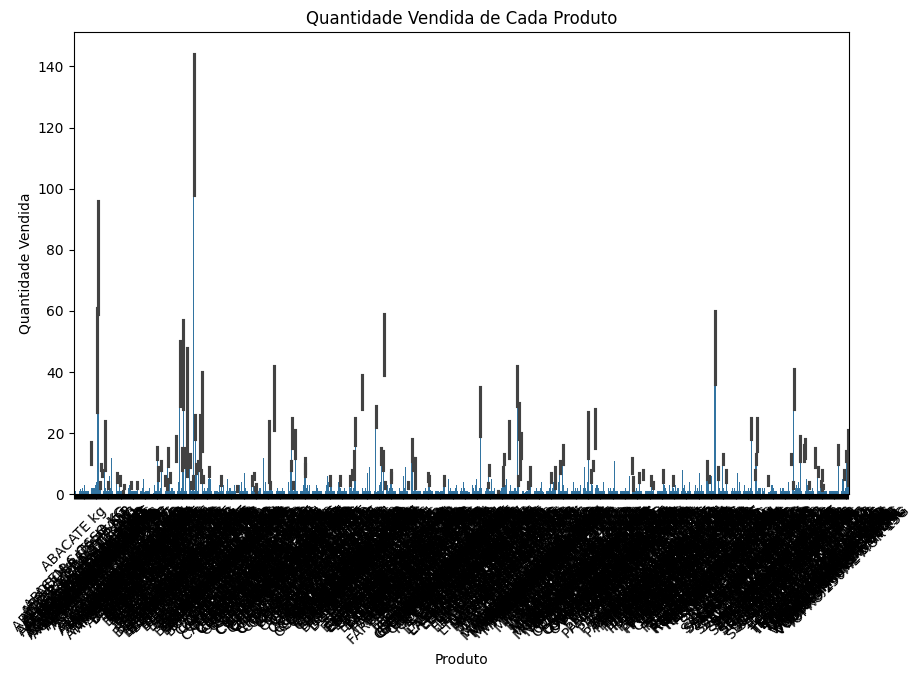

In [29]:
# Gráfico de Barras: Quantidade vendida de cada produto
plt.figure(figsize=(10, 6))
sns.barplot(x='PRODUTO', y='QTDE', data=df, estimator=sum)
plt.title('Quantidade Vendida de Cada Produto')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.show()

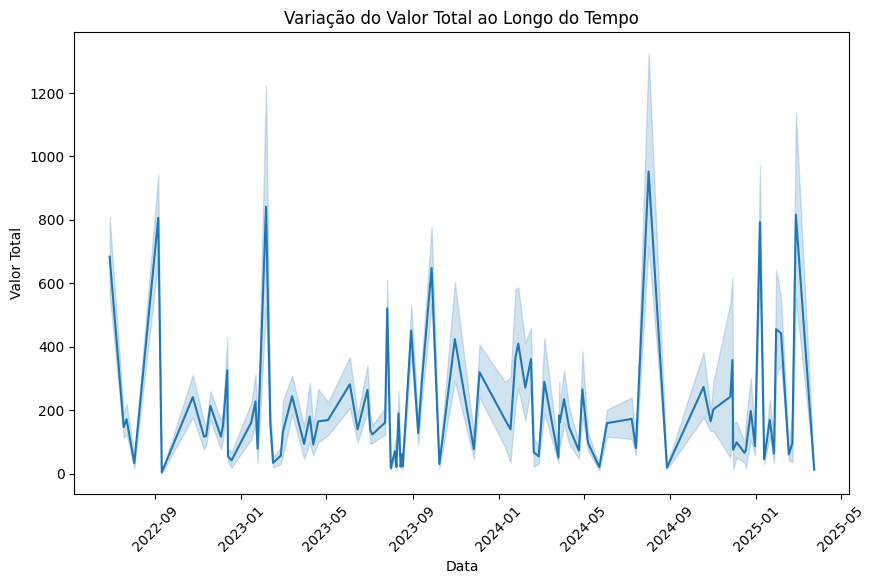

In [30]:
# Gráfico de Linhas: Variação do Valor Total ao Longo do Tempo
plt.figure(figsize=(10, 6))
df_sorted = df.sort_values(by='DATA')
sns.lineplot(x='DATA', y='VALOR_TOTAL', data=df_sorted, estimator=sum)
plt.title('Variação do Valor Total ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor Total')
plt.xticks(rotation=45)
plt.show()

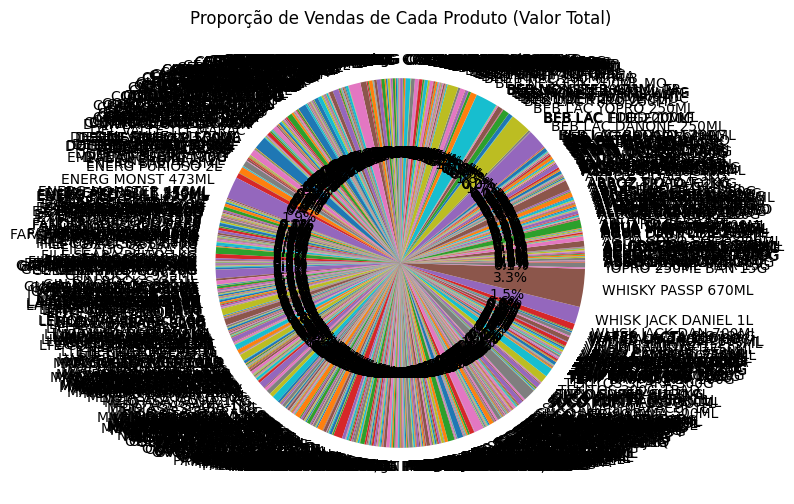

In [31]:
# Gráfico de Pizza: Proporção de Vendas de Cada Produto (em valor total)
plt.figure(figsize=(10, 6))
df_grouped = df.groupby('PRODUTO')['VALOR_TOTAL'].sum()
df_grouped.plot.pie(autopct='%1.1f%%')
plt.title('Proporção de Vendas de Cada Produto (Valor Total)')
plt.ylabel('')
plt.show()

In [32]:
toc = time.time()
print(f'\n\033[33mEtapa 7 | Tempo:\033[0;0m {tictoc(tic, toc)}')


Etapa 7 | Tempo: (00:00:25) [24/03/2025 22:48:58 - [24/03/2025 22:49:24]


[Retorna ao Índice](#indice)

---
<a id='8'></a>

## 8. Estudo de domínio

In [33]:
tic = time.time()

In [34]:
toc = time.time()
print(f'\n\033[33mEtapa 8 | Tempo:\033[0;0m {tictoc(tic, toc)}')


Etapa 8 | Tempo: (00:00:00) [24/03/2025 22:49:24 - [24/03/2025 22:49:24]


[Retorna ao Índice](#indice)

---
<a id='9'></a>

## 9. Análise de outliers

In [35]:
tic = time.time()

In [36]:
toc = time.time()
print(f'\n\033[33mEtapa 9 | Tempo:\033[0;0m {tictoc(tic, toc)}')


Etapa 9 | Tempo: (00:00:00) [24/03/2025 22:49:24 - [24/03/2025 22:49:24]


[Retorna ao Índice](#indice)

---
<a id='10'></a>

## 10. Transformações

In [37]:
tic = time.time()

In [38]:
toc = time.time()
print(f'\n\033[33mEtapa 10 | Tempo:\033[0;0m {tictoc(tic, toc)}')


Etapa 10 | Tempo: (00:00:00) [24/03/2025 22:49:24 - [24/03/2025 22:49:24]


[Retorna ao Índice](#indice)

---
<a id='11'></a>

## 11. Tempo decorrido

Previsão de Demanda: Use técnicas de séries temporais para prever a demanda futura de cada produto, permitindo ao supermercado ajustar seus estoques com mais eficiência e reduzir desperdícios.

Recomendação de Produtos: Desenvolva um sistema de recomendação personalizado baseado nos hábitos de compra dos clientes, sugerindo produtos que eles possam estar interessados em comprar.

Análise de Cesta de Compras: Utilize algoritmos de associação para identificar padrões de compra, como quais produtos são frequentemente comprados juntos. Isso pode ajudar a criar promoções ou combos de produtos.

Classificação de Produtos: Automatize a classificação de novos produtos com base nas descrições e características, facilitando a organização do inventário.

Análise de Sentimento: Se houver dados de feedback dos clientes, você pode aplicar técnicas de processamento de linguagem natural (NLP) para analisar o sentimento e entender melhor as opiniões dos clientes sobre os produtos.

Detecção de Anomalias: Use técnicas de detecção de anomalias para identificar transações suspeitas ou inconsistências nos dados, ajudando a detectar fraudes ou erros de entrada de dados.

Segmentação de Clientes: Aplique clustering para segmentar clientes com base em seus comportamentos de compra, permitindo campanhas de marketing mais direcionadas e eficazes.

Análise de Preços: Utilize machine learning para analisar a elasticidade de preços e identificar o impacto de mudanças de preços na demanda dos produtos.



In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Mean Squared Error: 3.018827929099475
R-squared: 0.020885604183550233


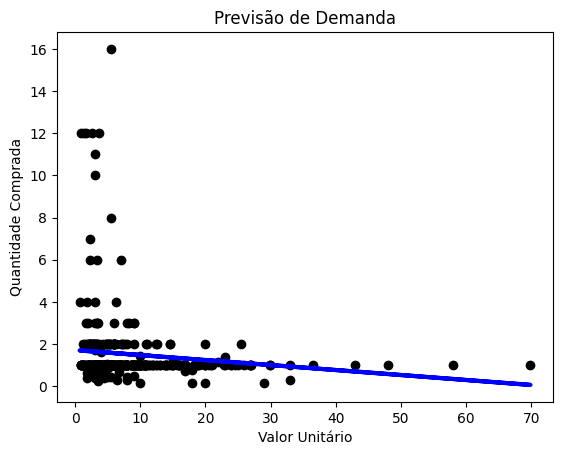

In [40]:
# Definindo as variáveis independentes (X) e dependentes (y)
X = df[['VALOR_UNIDADE']]
y = df['QTDE']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de Regressão Linear
model = LinearRegression()

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualizando os resultados
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Valor Unitário')
plt.ylabel('Quantidade Comprada')
plt.title('Previsão de Demanda')
plt.show()